# Section 1: Setup and Imports


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Section 2: Tensor Basics


In [3]:
# Creating Tensors
tensor = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
print("Tensor:", tensor)

Tensor: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [4]:
# Tensor operations
a = torch.rand(2, 3)
b = torch.rand(2, 3)
print("Addition:", a + b)

Addition: tensor([[1.5697, 1.1817, 1.3638],
        [1.6889, 0.9831, 1.7354]])


In [5]:
# Gradients example
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print("Gradient of x:", x.grad)

Gradient of x: tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# Section 3: Building a Neural Network


In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN().to(device)
print(model)




SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# Section 4: Loading Data


In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.08MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 58.0kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.50MB/s]


# Section 5: Training Loop


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1):  # Run only 1 epoch for demo
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")



Epoch 1, Loss: 0.1058


# Section 6: Testing and Evaluation


In [9]:
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")



Accuracy: 93.12%


# Section 7: Visualize Some Predictions


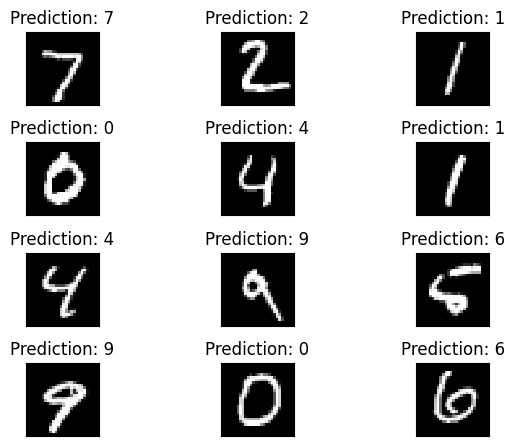

In [13]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data.to(device))

fig = plt.figure()
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()